In [2]:
pip install pandas_datareader


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import seaborn as sns

In [6]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     ------------------------------------- 314.6/314.6 kB 20.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --------------------------------- ------ 2.5/2.9 MB 52.3 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 37.2 MB/s eta 0:00:00
  In

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
start= '2010-01-01'
end= '2022-12-31'
import yfinance as yf

df = yf.download('AAPL', start=start, end=end)
df.head()

# df=data.DataReader('AAPL','yahoo',start,end)
# df.head()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3272 non-null   datetime64[ns]
 1   Open       3272 non-null   float64       
 2   High       3272 non-null   float64       
 3   Low        3272 non-null   float64       
 4   Close      3272 non-null   float64       
 5   Adj Close  3272 non-null   float64       
 6   Volume     3272 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.1 KB


In [10]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


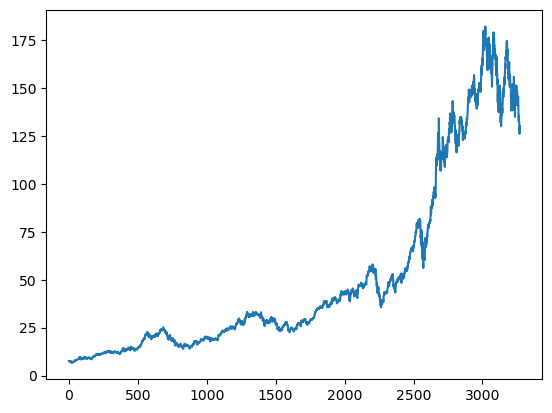

In [11]:
plt.plot(df.Close)

In [12]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

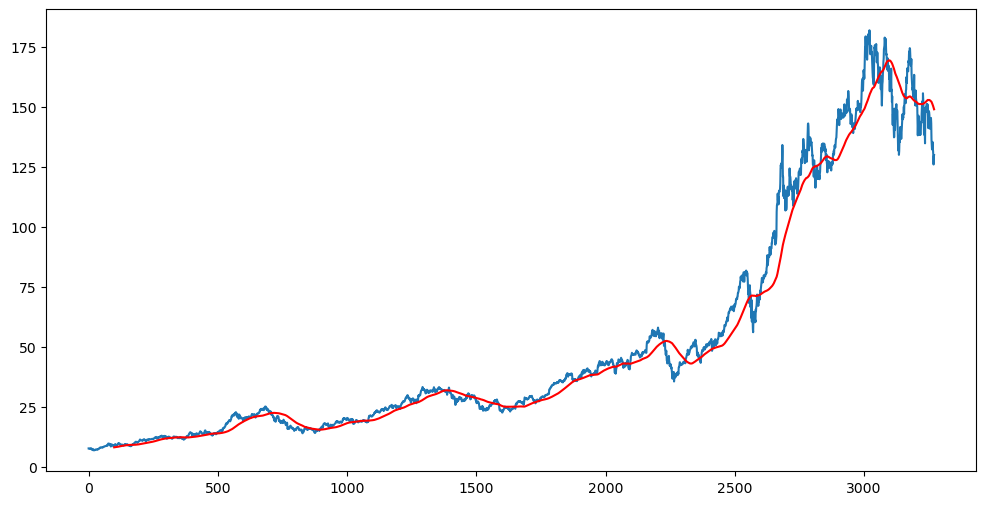

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

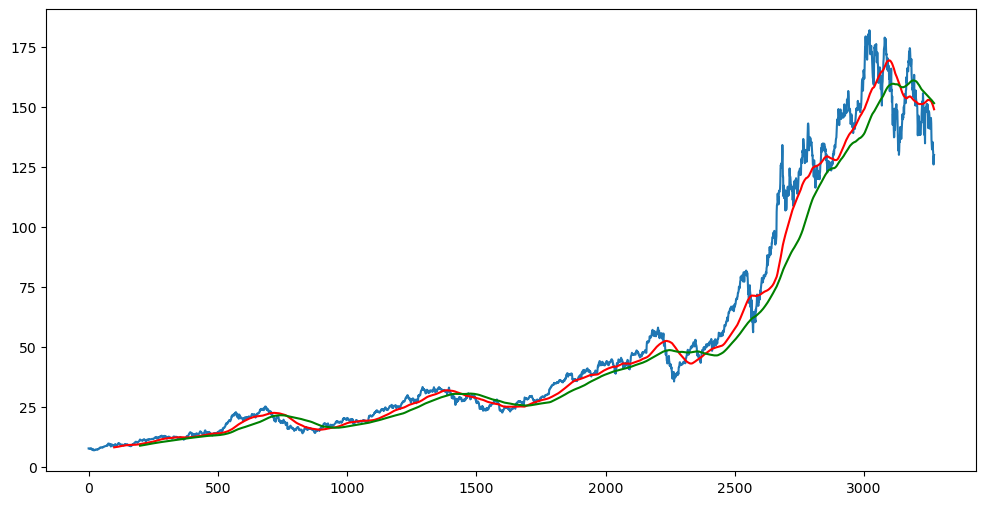

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
df.shape

(3272, 5)

In [19]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [20]:
data_training.shape

(2290, 1)

In [21]:
data_testing.shape

(982, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [24]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train

[array([[1.53304721e-02],
        [1.55887785e-02],
        [1.32082265e-02],
        [1.29359483e-02],
        [1.39133053e-02],
        [1.26078572e-02],
        [1.09393560e-02],
        [1.29848170e-02],
        [1.21331319e-02],
        [9.68974866e-03],
        [1.60495227e-02],
        [1.37387926e-02],
        [1.11836906e-02],
        [3.97921271e-03],
        [7.69315638e-03],
        [9.69672991e-03],
        [1.10510654e-02],
        [5.05429799e-03],
        [6.97193404e-06],
        [1.87092036e-03],
        [2.65978352e-03],
        [5.01241046e-03],
        [0.00000000e+00],
        [2.38053332e-03],
        [1.44507314e-03],
        [2.89016492e-03],
        [2.14317998e-03],
        [4.62146951e-03],
        [5.81524544e-03],
        [7.92353779e-03],
        [7.33014978e-03],
        [7.59541882e-03],
        [6.71579935e-03],
        [5.84316114e-03],
        [3.49751545e-03],
        [6.01072058e-03],
        [6.94618076e-03],
        [8.77522292e-03],
        [1.1

In [27]:
len(x_train)

2190

In [28]:
y_train

[0.04279409465628936,
 0.04525843099998514,
 0.04801596140411879,
 0.050194075621418116,
 0.04961464079304892,
 0.04461617419910349,
 0.041111658851187616,
 0.03998770478926103,
 0.03570827947832744,
 0.04081147421517342,
 0.04290581337476623,
 0.04344334203274733,
 0.047220116997441886,
 0.052497833783742315,
 0.05572309893930319,
 0.0572589190726511,
 0.054536304263329255,
 0.05710535010839074,
 0.055094786006504415,
 0.053719525412993185,
 0.05211385544848676,
 0.0532308375763719,
 0.04476277122932243,
 0.04152354356414384,
 0.03939430745127406,
 0.03831923149377703,
 0.03949903559417464,
 0.046508029006936624,
 0.04610313486955672,
 0.047171257534547206,
 0.04554465312638159,
 0.04171202812321603,
 0.0423612568581391,
 0.04146769352567284,
 0.04038562699259948,
 0.037369780839769995,
 0.041774850095728455,
 0.04341541701351184,
 0.04675238224601469,
 0.047394639046896336,
 0.046933894871045434,
 0.05028482261316605,
 0.048106708395866726,
 0.04611709737917449,
 0.045516728107146076

In [29]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [30]:
x_train.shape

(2190, 100, 1)

In [31]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [33]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50

69/69 [==============================] - 30s 317ms/step - loss: 0.0314
Epoch 2/50
69/69 [==============================] - 18s 265ms/step - loss: 0.0074
Epoch 3/50
69/69 [==============================] - 17s 251ms/step - loss: 0.0058
Epoch 4/50
69/69 [==============================] - 16s 239ms/step - loss: 0.0058
Epoch 5/50
69/69 [==============================] - 19s 269ms/step - loss: 0.0063
Epoch 6/50
69/69 [==============================] - 16s 233ms/step - loss: 0.0045
Epoch 7/50
69/69 [==============================] - 16s 230ms/step - loss: 0.0042
Epoch 8/50
69/69 [==============================] - 16s 237ms/step - loss: 0.0044
Epoch 9/50
69/69 [==============================] - 16s 234ms/step - loss: 0.0043
Epoch 10/50
69/69 [==============================] - 17s 244ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 15s 225ms/step - loss: 0.0039
Epoch 12/50
69/69 [==============================] - 16s 230ms/step - loss: 0.0038
Epoch 13/50


In [37]:
model.save('keras_model.h5')

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [41]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [43]:
past_100_days=data_training.tail(100)

In [45]:
final_df=past_100_days.append(data_testing,ignore_index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_15084\633413816.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=False)


In [46]:
final_df.head()

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500


In [47]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [48]:
input_data.shape

(1082, 1)

In [50]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    


In [51]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [52]:
x_test.shape

(982, 100, 1)

In [53]:
y_test.shape

(982,)

In [55]:
y_predicted=model.predict(x_test)

31/31 [==============================] - 4s 77ms/step


In [56]:
y_predicted.shape

(982, 1)

In [57]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [58]:
y_predicted

array([[0.10256794],
       [0.10379314],
       [0.10512863],
       [0.10653722],
       [0.10798284],
       [0.1094324 ],
       [0.11085573],
       [0.11222832],
       [0.11353704],
       [0.11476687],
       [0.11591558],
       [0.11699235],
       [0.11800413],
       [0.11895774],
       [0.11984672],
       [0.12067463],
       [0.12145212],
       [0.12218435],
       [0.12286666],
       [0.12348072],
       [0.12401475],
       [0.12450355],
       [0.12499344],
       [0.1255211 ],
       [0.12612084],
       [0.12682663],
       [0.12766643],
       [0.12863751],
       [0.12973292],
       [0.13098544],
       [0.13238087],
       [0.13386995],
       [0.13538578],
       [0.13688031],
       [0.13831714],
       [0.13967739],
       [0.14095846],
       [0.1421817 ],
       [0.14337428],
       [0.1445555 ],
       [0.145744  ],
       [0.14697215],
       [0.14825091],
       [0.1495852 ],
       [0.15095304],
       [0.15232487],
       [0.15367368],
       [0.154

In [59]:
scaler.scale_

array([0.00682769])

In [61]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

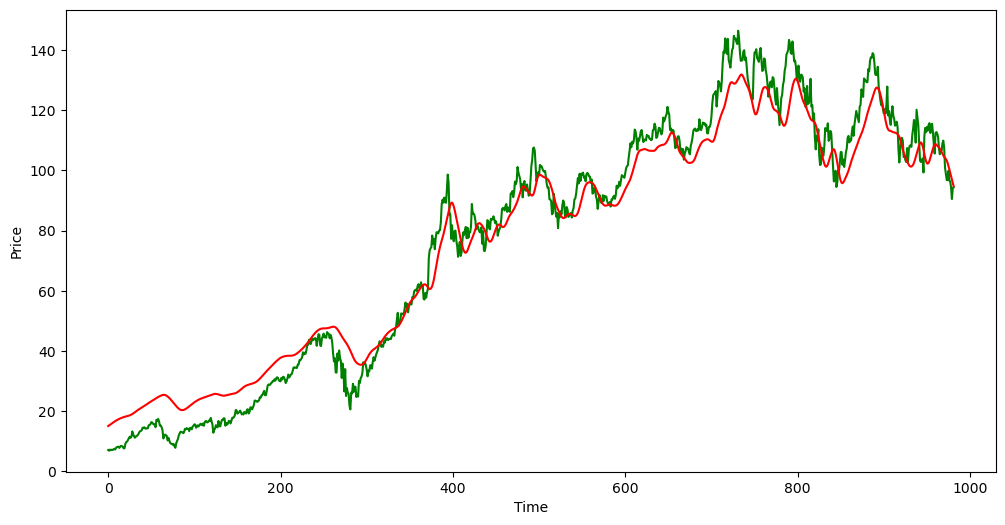

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()